<a href="https://colab.research.google.com/github/BasselWA/NLPAshrafBasil/blob/main/emailORG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import sketch
# from dataprep.eda import plot
# from transformers import pipeline
# from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
%matplotlib inline

In [12]:
import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = 'email_thread_details.csv'

# Read the CSV file into a DataFrame
email_threads_details = pd.read_csv(file_path)

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = 'email_thread_summaries.csv'

# Read the CSV file into a DataFrame
email_threads_summaries = pd.read_csv(file_path)

# Display the first few rows of the DataFra
# print(email_details.head(10))
# email_summaries.head()


In [13]:
print(email_threads_details.head())

   thread_id                     subject            timestamp  \
0          1  FW: Master Termination Log  2002-01-29 11:23:42   
1          1  FW: Master Termination Log  2002-01-31 12:50:00   
2          1  FW: Master Termination Log  2002-02-05 15:03:35   
3          1  FW: Master Termination Log  2002-02-05 15:06:25   
4          1  FW: Master Termination Log  2002-05-28 07:20:35   

                          from  \
0  Gossett, Jeffrey C. JGOSSET   
1      Theriot, Kim S. KTHERIO   
2      Theriot, Kim S. KTHERIO   
3      Theriot, Kim S. KTHERIO   
4   Kelly, Katherine L. KKELLY   

                                                  to  \
0  ['Giron', 'Darron C. Dgiron', 'Love', 'Phillip...   
1  ['Murphy', 'Melissa Mmurphy', 'Gossett', 'Jeff...   
2  ['Murphy', 'Melissa Mmurphy', 'Anderson', 'Dia...   
3  ['Hall', 'D. Todd Thall', 'Sweeney', 'Kevin Ks...   
4                       ['Germany', 'Chris Cgerman']   

                                                body  
0  \n\n ----

In [14]:
print(email_threads_summaries.head())

   thread_id                                            summary
0          1  The email thread discusses the Master Terminat...
1          2  A lunch meeting has been scheduled for May 5th...
2          3  Ben is updating a friend on his progress with ...
3          4  The recipient of the email thread initially ex...
4          5  The email thread discusses the long form confi...


In [15]:
email_threads_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21684 entries, 0 to 21683
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   thread_id  21684 non-null  int64 
 1   subject    21684 non-null  object
 2   timestamp  21684 non-null  object
 3   from       21684 non-null  object
 4   to         21684 non-null  object
 5   body       21684 non-null  object
dtypes: int64(1), object(5)
memory usage: 1016.6+ KB


In [16]:
email_threads_summaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   thread_id  4167 non-null   int64 
 1   summary    4167 non-null   object
dtypes: int64(1), object(1)
memory usage: 65.2+ KB


#Cleaning#

In [17]:
email_threads_details['timestamp'] = pd.to_datetime(email_threads_details['timestamp'])

In [18]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Merge the two datasets on 'thread_id'
email_data = pd.merge(email_threads_details, email_threads_summaries, on='thread_id', how='inner')

# Group emails by thread_id and concatenate the bodies
email_data_grouped = email_data.groupby('thread_id').agg({'body': ' '.join, 'summary': 'first'}).reset_index()

# Preprocess the data
# Remove any rows with missing values
email_data_grouped.dropna(inplace=True)

# Convert 'body' and 'summary' columns to lowercase
email_data_grouped['body'] = email_data_grouped['body'].str.lower()
email_data_grouped['summary'] = email_data_grouped['summary'].str.lower()

email_data.head()




,thread_id,subject,timestamp,from,to,body,summary
0,1,FW: Master Termination Log,2002-01-29 11:23:42,"Gossett, Jeffrey C. JGOSSET","['Giron', 'Darron C. Dgiron', 'Love', 'Phillip...",\n\n -----Original Message-----\nFrom: =09Ther...,The email thread discusses the Master Terminat...
1,1,FW: Master Termination Log,2002-01-31 12:50:00,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Gossett', 'Jeff...",\n\n -----Original Message-----\nFrom: =09Panu...,The email thread discusses the Master Terminat...
2,1,FW: Master Termination Log,2002-02-05 15:03:35,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Anderson', 'Dia...",Note to Stephanie Panus....\n\nStephanie...ple...,The email thread discusses the Master Terminat...
3,1,FW: Master Termination Log,2002-02-05 15:06:25,"Theriot, Kim S. KTHERIO","['Hall', 'D. Todd Thall', 'Sweeney', 'Kevin Ks...",\n\n -----Original Message-----\nFrom: =09Panu...,The email thread discusses the Master Terminat...
4,1,FW: Master Termination Log,2002-05-28 07:20:35,"Kelly, Katherine L. KKELLY","['Germany', 'Chris Cgerman']",\n\n -----Original Message-----\nFrom: =09McMi...,The email thread discusses the Master Terminat...


In [19]:
# Define preprocessing functions
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    clean_text = ' '.join(tokens)
    return clean_text


In [20]:
# Apply preprocessing to 'body' and 'summary' columns
email_data_grouped['body'] = email_data_grouped['body'].apply(clean_text)
email_data_grouped['summary'] = email_data_grouped['summary'].apply(clean_text)

# Convert 'body' and 'summary' to string type
email_data_grouped['body'] = email_data_grouped['body'].astype(str)
email_data_grouped['summary'] = email_data_grouped['summary'].astype(str)

#Analysis#

In [21]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

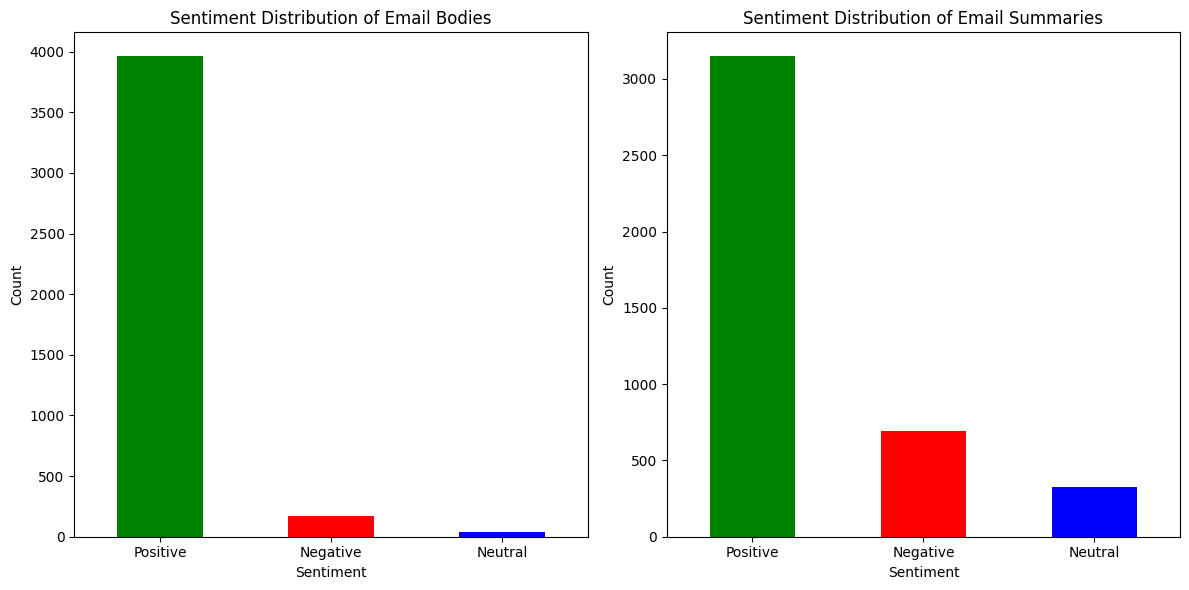

Overall Sentiment Summary (Before Summarization):
Positive: 3961 emails (95.06%)
Negative: 170 emails (4.08%)
Neutral: 36 emails (0.86%)

Overall Sentiment Summary (After Summarization):
Positive: 3148 emails (75.55%)
Negative: 690 emails (16.56%)
Neutral: 329 emails (7.90%)


In [22]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load email details dataset
email_details_df = email_data_grouped

# Load email summaries dataset
# email_summaries_df = email_threads_summaries

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to email bodies
email_details_df['body_sentiment'] = email_details_df['body'].apply(get_sentiment_score)

# Apply sentiment analysis to email summaries
email_details_df['summary_sentiment'] = email_details_df['summary'].apply(get_sentiment_score)

# Calculate sentiment distribution before summarization
body_sentiment_counts = email_details_df['body_sentiment'].value_counts()
summary_sentiment_counts = email_details_df['summary_sentiment'].value_counts()

# Plotting sentiment distribution before summarization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
body_sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Email Bodies')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
summary_sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Email Summaries')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Summarize overall sentiment before summarization
positive_count_before = body_sentiment_counts.get('Positive', 0)
negative_count_before = body_sentiment_counts.get('Negative', 0)
neutral_count_before = body_sentiment_counts.get('Neutral', 0)
total_count_before = len(email_details_df)

print("Overall Sentiment Summary (Before Summarization):")
print(f"Positive: {positive_count_before} emails ({(positive_count_before/total_count_before)*100:.2f}%)")
print(f"Negative: {negative_count_before} emails ({(negative_count_before/total_count_before)*100:.2f}%)")
print(f"Neutral: {neutral_count_before} emails ({(neutral_count_before/total_count_before)*100:.2f}%)")

# Summarize overall sentiment after summarization
positive_count_after = summary_sentiment_counts.get('Positive', 0)
negative_count_after = summary_sentiment_counts.get('Negative', 0)
neutral_count_after = summary_sentiment_counts.get('Neutral', 0)
total_count_after = len(email_details_df)

print("\nOverall Sentiment Summary (After Summarization):")
print(f"Positive: {positive_count_after} emails ({(positive_count_after/total_count_after)*100:.2f}%)")
print(f"Negative: {negative_count_after} emails ({(negative_count_after/total_count_after)*100:.2f}%)")
print(f"Neutral: {neutral_count_after} emails ({(neutral_count_after/total_count_after)*100:.2f}%)")


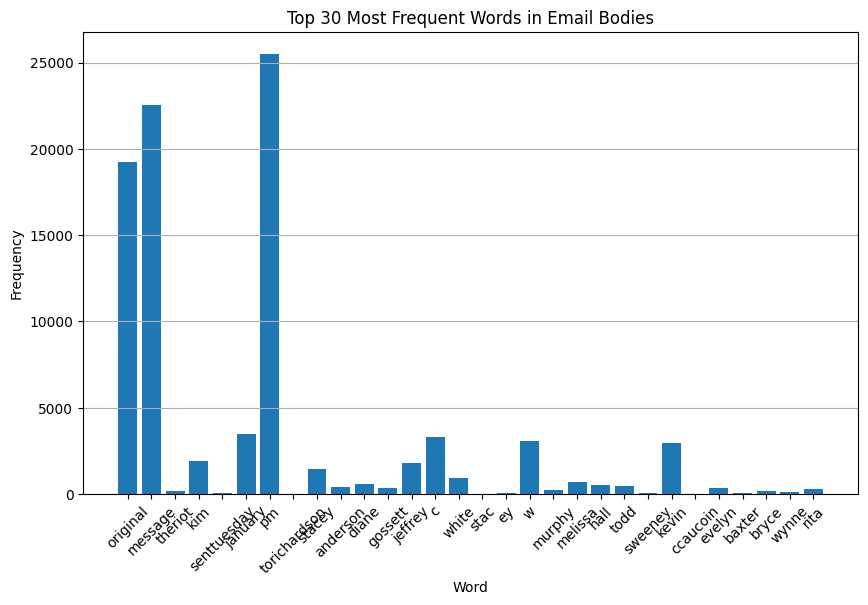

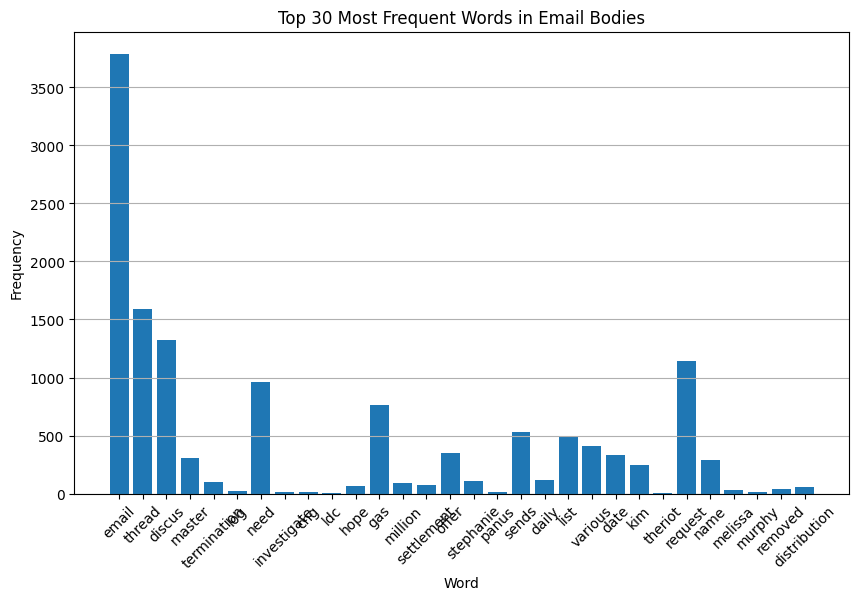

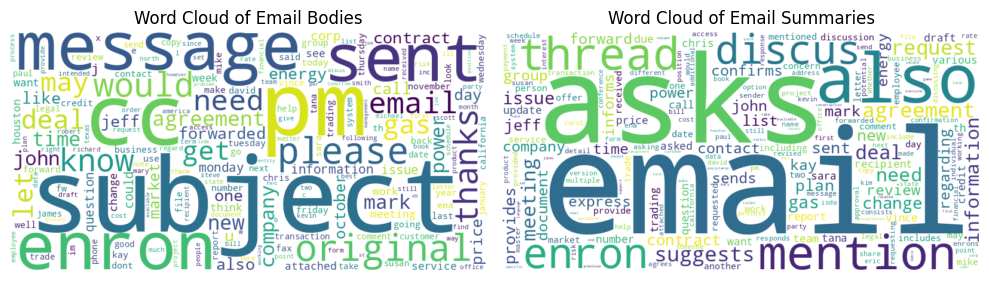

In [23]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming email_data_grouped contains the email details and summaries

# Tokenize email bodies and calculate word frequencies
email_data_grouped['tokens_body'] = email_data_grouped['body'].apply(lambda x: word_tokenize(str(x)))
all_body_tokens = [token for sublist in email_data_grouped['tokens_body'] for token in sublist]
body_freq_dist = FreqDist(all_body_tokens)

# Generate word cloud for email bodies
wordcloud_body = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(body_freq_dist)

# Convert FreqDist to a dictionary
body_freq_dict = dict(body_freq_dist)

# Plot word frequency histogram for email bodies
plt.figure(figsize=(10, 6))
plt.bar(list(body_freq_dict.keys())[:30], list(body_freq_dict.values())[:30])
plt.title('Top 30 Most Frequent Words in Email Bodies')
plt.xlabel('Word')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Tokenize summaries and calculate word frequencies
email_data_grouped['tokens_summary'] = email_data_grouped['summary'].apply(lambda x: word_tokenize(str(x)))
all_summary_tokens = [token for sublist in email_data_grouped['tokens_summary'] for token in sublist]

if len(all_summary_tokens) > 0:
    # Generate word cloud for summaries
    summary_freq_dist = FreqDist(all_summary_tokens)
    wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(summary_freq_dist)

    # Convert FreqDist to a dictionary
    body_freq_dict = dict(summary_freq_dist)

    # Plot word frequency histogram for email bodies
    plt.figure(figsize=(10, 6))
    plt.bar(list(body_freq_dict.keys())[:30], list(body_freq_dict.values())[:30])
    plt.title('Top 30 Most Frequent Words in Email Bodies')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    # plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Show word clouds
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_body, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Email Bodies')

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_summary, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Email Summaries')

    plt.tight_layout()
    plt.show()
else:
    print("No meaningful text found in email summaries for word frequency analysis.")


#co#

In [1]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming email_data_grouped contains the email details and summaries

# # Separate email bodies and summaries
# email_bodies = email_data_grouped['body']
# email_summaries = email_data_grouped['summary']

# # Calculate word correlations using TF-IDF
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix_bodies = tfidf_vectorizer.fit_transform(email_bodies)
# tfidf_matrix_summaries = tfidf_vectorizer.transform(email_summaries)

# # Convert TF-IDF matrices to DataFrames for easier analysis
# tfidf_df_bodies = pd.DataFrame(tfidf_matrix_bodies.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# tfidf_df_summaries = pd.DataFrame(tfidf_matrix_summaries.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Calculate word correlations using co-occurrence matrix
# count_vectorizer = CountVectorizer(stop_words='english')
# count_matrix_bodies = count_vectorizer.fit_transform(email_bodies)
# count_matrix_summaries = count_vectorizer.transform(email_summaries)

# # Convert co-occurrence matrices to DataFrames for easier analysis
# count_df_bodies = pd.DataFrame(count_matrix_bodies.toarray(), columns=count_vectorizer.get_feature_names_out())
# count_df_summaries = pd.DataFrame(count_matrix_summaries.toarray(), columns=count_vectorizer.get_feature_names_out())

# # Calculate word correlation matrices
# word_corr_bodies = count_df_bodies.corr()
# word_corr_summaries = count_df_summaries.corr()

# # Plot correlation heatmaps for body and summary
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.heatmap(word_corr_bodies, cmap='coolwarm', linewidths=.5)
# plt.title('Word Correlation in Email Bodies')

# plt.subplot(1, 2, 2)
# sns.heatmap(word_corr_summaries, cmap='coolwarm', linewidths=.5)
# plt.title('Word Correlation in Email Summaries')

# plt.tight_layout()
# plt.show()


#Training#

In [ ]:
# Shuffle the dataset
# email_data_grouped = email_data_grouped.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into train and test sets
train_size = int(len(email_data_grouped) * 0.8)
X_train = email_data_grouped['body'][:train_size]
y_train = email_data_grouped['summary'][:train_size]
X_test = email_data_grouped['body'][train_size:]
y_test = email_data_grouped['summary'][train_size:]

# Display the shape of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (3333,) (3333,)
Test set shape: (834,) (834,)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenize input sequences
tokenizer_inputs = Tokenizer()
tokenizer_inputs.fit_on_texts(X_train)
X_train_sequences = tokenizer_inputs.texts_to_sequences(X_train)
X_test_sequences = tokenizer_inputs.texts_to_sequences(X_test)

max_len_input = max(len(seq) for seq in X_train_sequences)

# Pad input sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len_input, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len_input, padding='post')


In [ ]:
# Tokenize summary sequences
tokenizer_outputs = Tokenizer()
tokenizer_outputs.fit_on_texts(y_train)
y_train_sequences = tokenizer_outputs.texts_to_sequences(y_train)
y_test_sequences = tokenizer_outputs.texts_to_sequences(y_test)

max_len_output = max(len(seq) for seq in y_train_sequences)

# # Pad summary sequences
# y_train_padded = pad_sequences(y_train_sequences, maxlen=max_len_output, padding='post')
# y_test_padded = pad_sequences(y_test_sequences, maxlen=max_len_output, padding='post')


# Pad summary sequences with an extra token at the beginning
y_train_padded = pad_sequences(y_train_sequences, maxlen=max_len_output+1, padding='pre')
y_test_padded = pad_sequences(y_test_sequences, maxlen=max_len_output+1, padding='pre')


In [ ]:
# Define model architecture
latent_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_len_input,))
encoder_embedding = Embedding(len(tokenizer_inputs.word_index) + 1, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_len_output,))
decoder_embedding = Embedding(len(tokenizer_outputs.word_index) + 1, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(len(tokenizer_outputs.word_index) + 1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


In [ ]:
# Compile model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train model
model.fit([X_train_padded, y_train_padded[:, :-1]], y_train_padded[:, 1:], epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1846s 44s/step - loss: 8.3124 - val_loss: 4.5461
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1781s 42s/step - loss: 4.1438 - val_loss: 3.7125
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1768s 42s/step - loss: 3.6042 - val_loss: 3.5731
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1771s 42s/step - loss: 3.5271 - val_loss: 3.5219
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1769s 42s/step - loss: 3.4461 - val_loss: 3.4914
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23947s 583s/step - loss: 3.4106 - val_loss: 3.4723
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1744s 41s/step - loss: 3.3953 - val_loss: 3.4611
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1750s 42s/step - loss: 3.3908 - val_loss: 3.4516
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1770s 42s/step - loss: 3.3842 - val_loss: 3.4432
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1741s 41s/step - loss: 3.3403 - val_loss: 3.4356


In [ ]:
# Define the file path to save the model
model_path = "./text_summarization_model.h5"

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)


Model saved successfully at: ./text_summarization_model.h5


In [ ]:
# Evaluate model
loss = model.evaluate([X_test_padded, y_test_padded[:, :-1]], y_test_padded[:, 1:])
print("Test loss:", loss)

27/27 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - loss: 3.1417
Test loss: 3.163663864135742
